In [137]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [138]:
DF = pd.read_csv('C:\\Users\\ACER\\OneDrive - Universitas Airlangga\\Kuliah\\Learn-MLZoomCamp2023\\Learn-MLZoomCamp2023\\HomeWork\\raw.githubusercontent.com_alexeygrigorev_mlbookcamp-code_master_chapter-02-car-price_data.csv')
DF.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [139]:
features = ['Make','Model','Year','Engine HP', 'Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
df = DF[features]
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [140]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [141]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [142]:
df.rename(columns = {'msrp':'price'}, inplace = True)
avg = df['price'].mean()
df['above_average'] = (df['price'] > avg).astype(int)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [143]:
df_full_train,x_test = train_test_split(df,test_size=0.2,random_state=1)
x_train,x_val = train_test_split(df_full_train,test_size=0.25, random_state=1)

x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

y_train = x_train['above_average'].values
y_val = x_val['above_average'].values
y_test = x_test['above_average'].values

del x_train['above_average']
del x_val['above_average']
del x_test['above_average']

del x_train['price']
del x_val['price']
del x_test['price']

In [144]:
df.dtypes 

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
above_average          int32
dtype: object

In [145]:
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
for i in numerical:
    auc = roc_auc_score(y_train,x_train[i])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -x_train[i])
    print('%19s, %.3f' % (i, auc))


               year, 0.688
          engine_hp, 0.917
   engine_cylinders, 0.766
        highway_mpg, 0.633
           city_mpg, 0.673


In [146]:
categorical = [x for x in x_train.columns if x  not in numerical]
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [147]:
dv = DictVectorizer(sparse=False)

train_dicts = x_train[categorical + numerical].to_dict(orient = 'records')
x_train = dv.fit_transform(train_dicts)

val_dict = x_val[categorical + numerical].to_dict(orient='records')
x_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [148]:
y_pred = model.predict_proba(x_val)[:, 1]
round(roc_auc_score(y_val,y_pred),4)

0.9798

In [149]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [150]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)


In [151]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

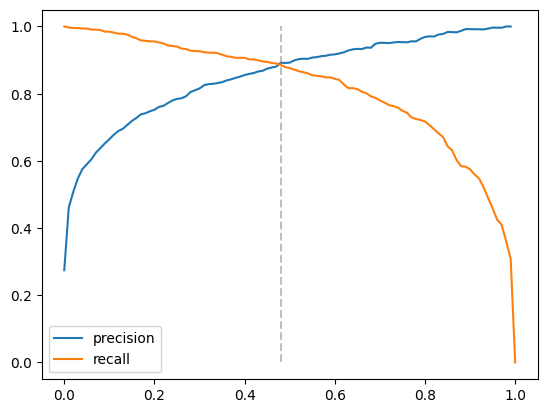

In [152]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.48, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

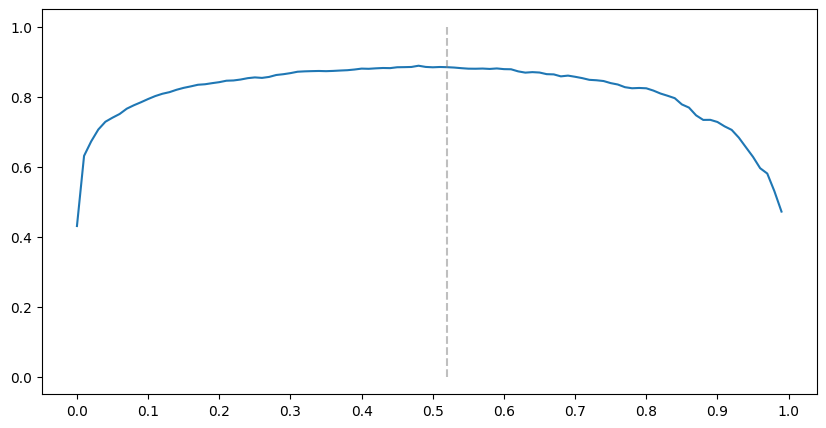

In [153]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.52, 0,1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [154]:
df_scores

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,654,1729,0,0,0.274444,1.000000,0.430688
1,0.01,652,760,2,969,0.461756,0.996942,0.631171
2,0.02,651,631,3,1098,0.507800,0.995413,0.672521
3,0.03,651,538,3,1191,0.547519,0.995413,0.706457
4,0.04,650,480,4,1249,0.575221,0.993884,0.728700
...,...,...,...,...,...,...,...,...
96,0.96,278,1,376,1728,0.996416,0.425076,0.595927
97,0.97,268,1,386,1728,0.996283,0.409786,0.580715
98,0.98,236,0,418,1729,1.000000,0.360856,0.530337
99,0.99,202,0,452,1729,1.000000,0.308869,0.471963


In [155]:
max = df_scores['f1'].idxmax()
df_scores.iloc[48]

threshold       0.480000
tp            579.000000
fp             70.000000
fn             75.000000
tn           1659.000000
p               0.892142
r               0.885321
f1              0.888718
Name: 48, dtype: float64

In [156]:
max

48

In [160]:
from sklearn.model_selection import KFold

In [165]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical+numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [169]:
del df_full_train['price']

In [170]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    
    
    y_train = df_train['above_average']
    y_val = df_val['above_average']


    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.980 +- 0.003


In [173]:
for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['above_average']
        y_val = df_val['above_average']

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.003
C= 0.1, 0.972 +- 0.001
C=   1, 0.980 +- 0.003
C=  10, 0.982 +- 0.003
